<a href="https://colab.research.google.com/github/AlanFirmino2024/Introducao_a_ciencia_de_dados/blob/main/08_algoritmo_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importando bibliotecas

In [1]:
# Algoritimo SVM e Métricas de Avaliação de Classificação Binária

## 1. Introdução

#(SVM) é um algoritmo de aprendizado supervisionado usado tanto para classificação
#quanto para regressão. O objetivo principal do SVM é encontrar um hiperplano em um
#espaço de múltiplas dimensões que separa as diferentes classes de dados de maneira ótima.
#No contexto da classificação binária, o SVM tenta encontrar a linha,
#plano ou hiperplano que melhor separa duas classes de dados.

## 2. Criação do Conjunto de Dados Sintético

#Importa a biblioteca Numpy
import numpy as np
#Importa a biblioteca pandas
import pandas as pd
#Importa a função make_classification da biblioteca Scikit-learn, usada para
#gerar conjuntos de dados sintéticos.
from sklearn.datasets import make_classification
#Importa a biblioteca Matplotlib, usada para criar visualizações gráficas.
import matplotlib.pyplot as plt
#Importa a função train_test_split que divide o data set em treino e teste.
from sklearn.model_selection import train_test_split
#Importa a classe KNeighborsClassifier, que implementa o algoritmo kNN.
from sklearn.neighbors import KNeighborsClassifier
#Importa a função confusion_matrix que é usada para calcular a matriz de confusão.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Importa as funções roc_curve e AUC que são usadas para calcular e avaliar modelos.
from sklearn.metrics import roc_curve, auc
#Importa a função classification_report que é usada para calcular e avaliar modelos.
from sklearn.metrics import classification_report
#Importa a classe StandardScaler que é usada para padronizar (normalizar) os dados.
from sklearn.preprocessing import StandardScaler
#Importa a classe SVC que é que implementa o algoritmo de classificação SVM.
from sklearn.svm import SVC
#Importa a biblioteca Seaborn, que fornece uma interface de visualização de dados.
import seaborn as sns

## 3. Criando conjunto de dados sintéticos

A função "***make_classification***" cria um conjunto de dados sintético para um problema de classificação binária, onde X contém as características (features) e y os rótulos (targets). Nesse caso geramos 1000 amostras, onde cada amostra possui 8 características que são informativas e 2 não redundantes.

In [2]:
#Cria um conjunto de dados sintético
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2,
                           n_classes=2, random_state=42)


#Converte X em um DataFrame, com colunas nomeadas como 'Feature_1' e 'Feature_2'.
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(10)])
#Adiciona a coluna 'Target' ao DataFrame df, contendo os rótulos y.
df['Target'] = y

#Exibe as primeiras 5 linhas do DataFrame df.
df.head()

# Salvando o conjunto de dados original (sem padronização)
df.to_csv('dados_original.csv', index=False)

## 3. Padronizando os dados

In [3]:
#Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvando o conjunto de dados padronizado
df_scaled = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(10)])
df_scaled['Target'] = y
df_scaled.to_csv('dados_padronizados.csv', index=False)

## 4. Dividindo o conjunto de dados

In [4]:
#Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Verifica as dimensões dos dados de teste e treino.
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (800, 10)
Tamanho do conjunto de teste: (200, 10)


## 3. Treinamento do algoritimo SVM no Dataset



In [7]:
# Testando com diferentes kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    # Modelo sem padronização
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)

#Faz previsões no conjunto de teste
y_pred = svm.predict(X_test)

# Modelo com padronização
svm_scaled = SVC(kernel=kernel, random_state=42)
svm_scaled.fit(X_train_scaled, y_train)

# Previsão e métricas de avaliação no conjunto de teste padronizado
y_pred_scaled = svm_scaled.predict(X_test_scaled)

## 4. Matriz de confusão

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.91      0.77      0.84       106
           1       0.78      0.91      0.84        94

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



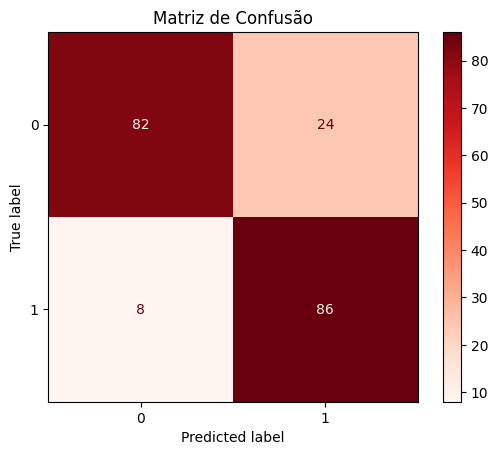

In [8]:
#Calcula a matriz de confusão comparando os rótulos reais (y_test) com os rótulos previstos pelo modelo (y_pred).
cm = confusion_matrix(y_test, y_pred)
#Avalia o desempenho do modelo
print("Relatório de classificação:\n", classification_report(y_test, y_pred))
#Cria um objeto para facilitar a visualização da matriz de confusão.
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#Plota a matriz de confusão utilizando um mapa de cores chamado 'Blues'.
disp.plot(cmap='Reds')
#Define o título do gráfico como "Matriz de Confusão".
plt.title('Matriz de Confusão')
#Exibe o gráfico com a matriz de confusão.
plt.show()


## 5. Teste padronizado

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       106
           1       0.76      0.96      0.85        94

    accuracy                           0.83       200
   macro avg       0.85      0.84      0.83       200
weighted avg       0.86      0.83      0.83       200



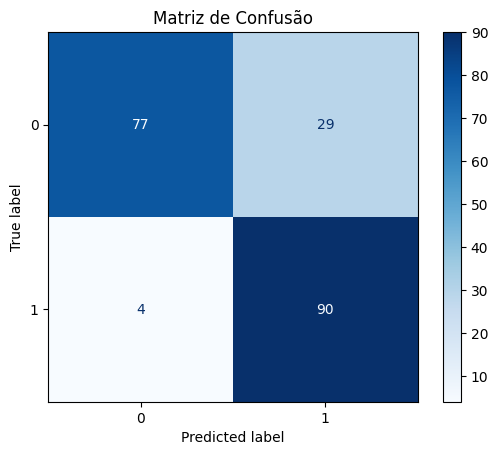

In [9]:
# Previsão e métricas de avaliação no conjunto de teste padronizado
y_pred_scaled = svm_scaled.predict(X_test_scaled)

#Calcula a matriz de confusão comparando os rótulos reais (y_test) com os
#rótulos previstos pelo modelo (y_pred_scaled).
cm1 = confusion_matrix(y_test, y_pred_scaled)
#Avalia o desempenho do modelo
print("Relatório de classificação:\n", classification_report(y_test, y_pred_scaled))
#Cria um objeto para facilitar a visualização da matriz de confusão.
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
#Plota a matriz de confusão utilizando um mapa de cores chamado 'Blues'.
disp.plot(cmap='Blues')
#Define o título do gráfico como "Matriz de Confusão".
plt.title('Matriz de Confusão')
#Exibe o gráfico com a matriz de confusão.
plt.show()




## 5. Curva ROC

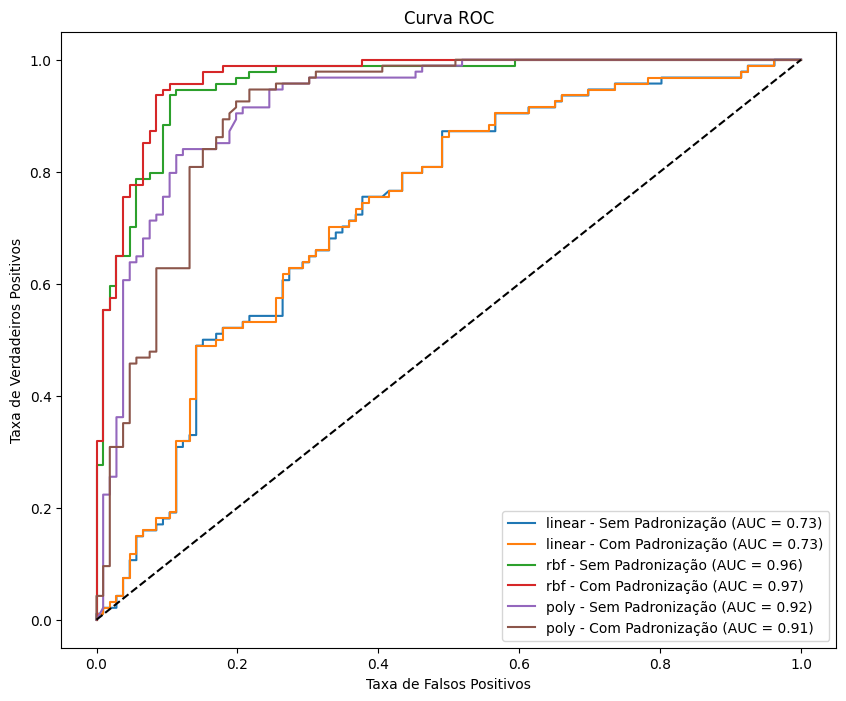

In [11]:
# Curva ROC e AUC
# Função para plotar a curva ROC
def plot_roc_curve(y_true, y_scores, label):
    # Calcula a curva ROC e a área sob a curva (AUC)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    # Calcula a área sob a curva (AUC)
    roc_auc = auc(fpr, tpr)
    # Plota a curva ROC
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))

# Treinando novamente os modelos para obter as probabilidades
for kernel in kernels:
    # Modelo sem padronização
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    # Treinamento do modelo com os dados não padronizados
    svm.fit(X_train, y_train)
    # Previsão das probabilidades
    y_scores = svm.predict_proba(X_test)[:, 1]
    # Plota a curva ROC
    plot_roc_curve(y_test, y_scores, label=f'{kernel} - Sem Padronização')

    # Modelo com padronização
    svm_scaled = SVC(kernel=kernel, probability=True, random_state=42)
    # Treinamento do modelo com os dados padronizados
    svm_scaled.fit(X_train_scaled, y_train)
    # Previsão das probabilidades
    y_scores_scaled = svm_scaled.predict_proba(X_test_scaled)[:, 1]
    # Plota a curva ROC
    plot_roc_curve(y_test, y_scores_scaled, label=f'{kernel} - Com Padronização')

# Legenda
plt.plot([0, 1], [0, 1], 'k--')
#Define a legenda do eixo X
plt.xlabel('Taxa de Falsos Positivos')
#Define a legenda do eixo Y
plt.ylabel('Taxa de Verdadeiros Positivos')
#Define o título do gráfico
plt.title('Curva ROC')
#Define a posição da legenda
plt.legend(loc='lower right')
#Exibe o gráfico
plt.show()

## 6. Fronteira de decisão

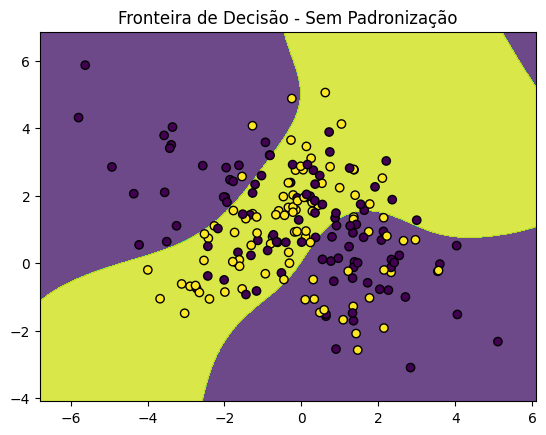

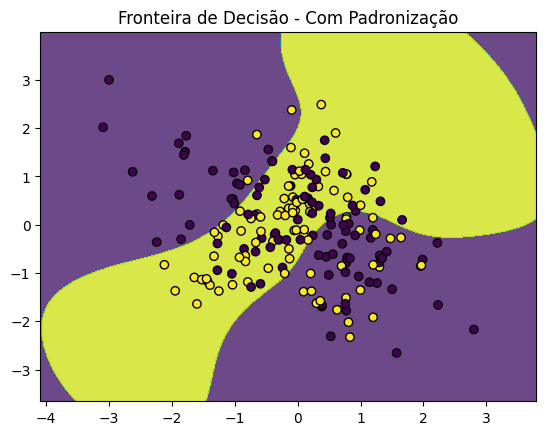

In [13]:
# 6. Visualização da Fronteira de Decisão
# Utilizando apenas as duas primeiras features para visualização
def plot_decision_boundary(X, y, model, title):
    # Calcula os limites dos dados
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Cria uma grade de pontos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prediz os rótulos para cada ponto na grade
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Ajusta a forma dos dados
    Z = Z.reshape(xx.shape)

    # Plota a fronteira de decisão
    plt.contourf(xx, yy, Z, alpha=0.8)
    # Plota os pontos
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    #Define o título do gráfico
    plt.title(title)
    #Exibe o gráfico
    plt.show()

# Ajustando SVM com as duas primeiras features
X_train_2d = X_train[:, :2]
X_train_scaled_2d = X_train_scaled[:, :2]
X_test_2d = X_test[:, :2]
X_test_scaled_2d = X_test_scaled[:, :2]

# Treinando os modelos sem padronização
svm_2d = SVC(kernel='rbf', random_state=42)
# Treinamento do modelo com os dados não padronizados
svm_2d.fit(X_train_2d, y_train)
# Plota a fronteira de decisão sem os dados padronizados
plot_decision_boundary(X_test_2d, y_test, svm_2d, 'Fronteira de Decisão - Sem Padronização')

# Treinando os modelos com padronização
svm_scaled_2d = SVC(kernel='rbf', random_state=42)
# Treinamento do modelo com os dados padronizados
svm_scaled_2d.fit(X_train_scaled_2d, y_train)
# Plota a fronteira de decisão com os dados padronizados
plot_decision_boundary(X_test_scaled_2d, y_test, svm_scaled_2d, 'Fronteira de Decisão - Com Padronização')

## 7. Conclusão

A padronização dos dados teve um impacto significativo no desempenho do algoritmo SVM.
Os dados padronizados resultaram em um melhor desempenho, especialmente com kernels não lineares como o RBF e o polinomial.
Isso ocorre porque a padronização garante que todas as features tenham a mesma escala, o que é crucial para algoritmos baseados em distância, como o SVM.
A análise da curva ROC e das fronteiras de decisão reforça essa observação.